In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import calendar

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature

In [2]:
#url = 'https://downloads.psl.noaa.gov/Datasets/dai_pdsi/pdsi.mon.mean.nc'
ds = xr.open_dataset('pdsi.mon.mean.nc')
ds_month = ds.groupby('time.month').mean()
ds_month

<xarray.Dataset> Size: 381kB
Dimensions:  (month: 12, lat: 55, lon: 144)
Coordinates:
  * lon      (lon) float32 576B -178.8 -176.2 -173.8 ... 173.8 176.2 178.8
  * lat      (lat) float32 220B -58.75 -56.25 -53.75 ... 71.25 73.75 76.25
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    pdsi     (month, lat, lon) float32 380kB nan nan nan nan ... nan nan nan nan
Attributes:
    title:            Global Monthly Dai Palmer Drought Severity Index
    history:          recreated Feb 2007 from data at NCAR webpage
    References:       https://www.psl.noaa.gov/data/gridded/data.pdsi.html
    original_source:  NCAR/UCAR: A Dai.
    comments:         This version of the dataset (1870-2005) supersedes the ...
    Conventions:      COARDS
    details:          see ncar for more detials and updates\nhttp://www.cgd.u...
    dataset_title:    Palmer Drought Severity Index

Text(0.5, 0.92, 'Palmer Drought Severity Index')

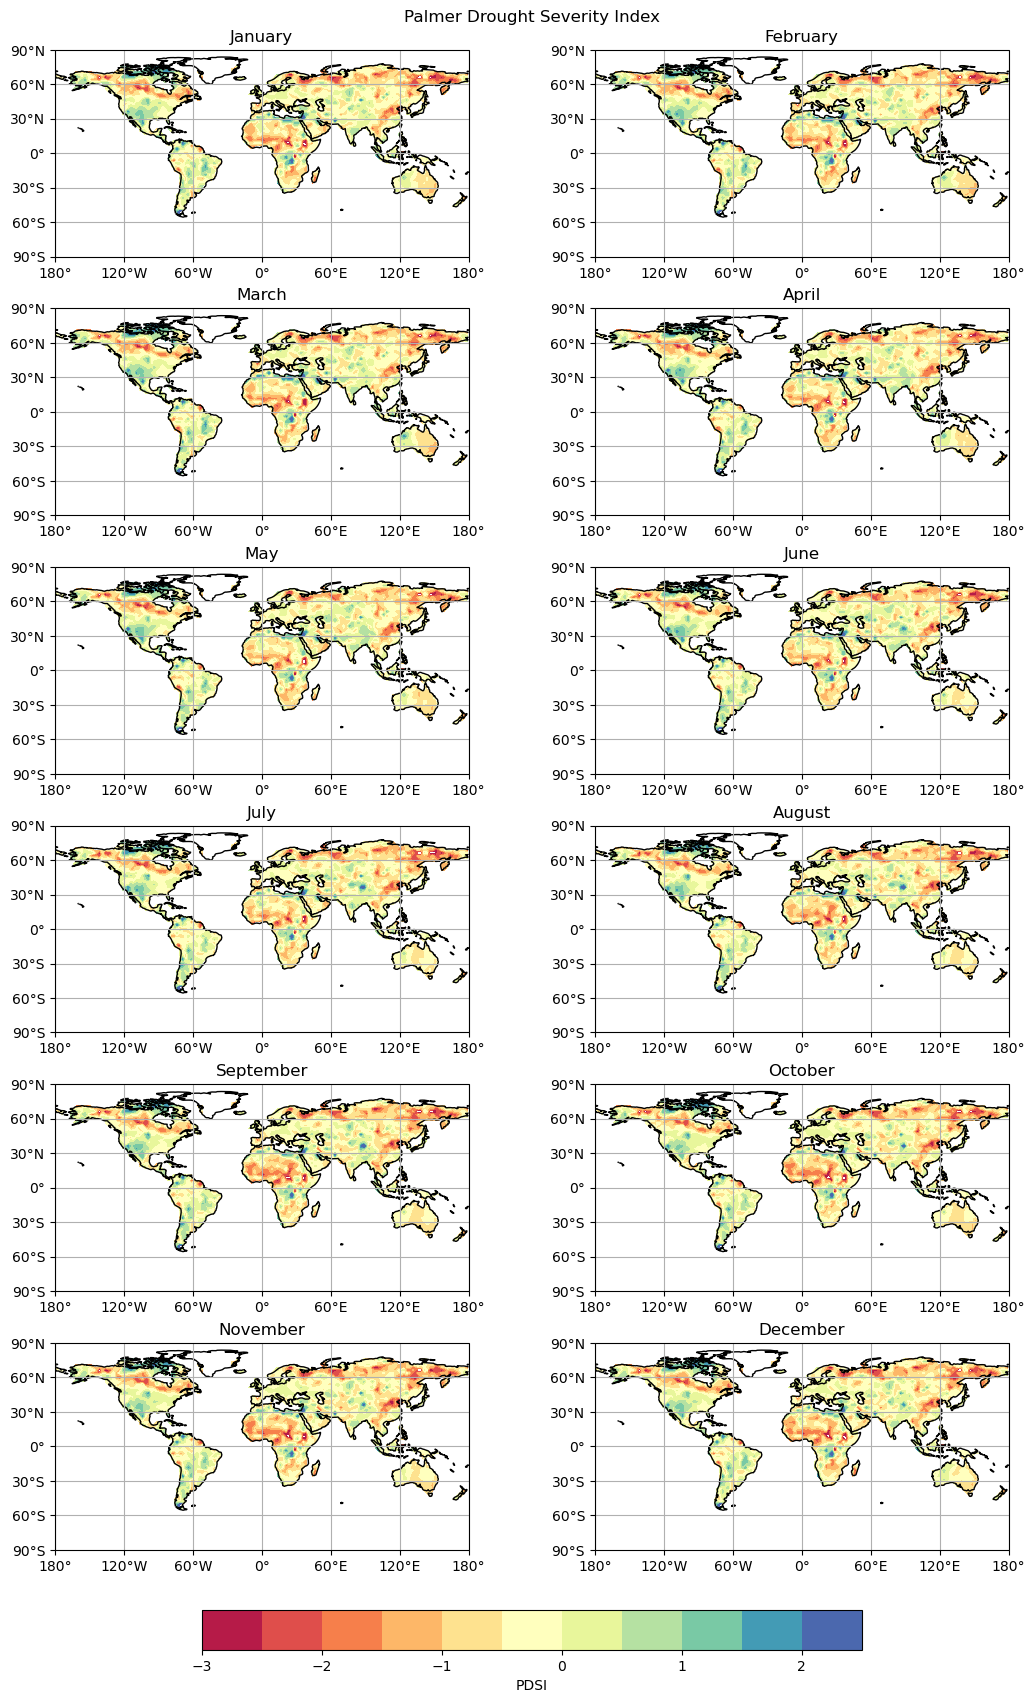

In [3]:
fig, axs = plt.subplots(nrows=6, ncols=2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(11,20))

axs= axs.flatten()

clevs=np.arange(-3,3,.5)

for i,month in enumerate(ds_month['month']):
    cs=axs[i].contourf(ds_month['lon'], ds_month['lat'], ds_month['pdsi'].sel(month=month), levels=clevs, transform=ccrs.PlateCarree(), cmap='Spectral')
    
    axs[i].set_title(calendar.month_name[month.values])
    
    axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    axs[i].xaxis.set_major_formatter(lon_formatter)

    axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    axs[i].yaxis.set_major_formatter(lat_formatter) 
    
    axs[i].gridlines()
    
    axs[i].coastlines()

fig.subplots_adjust(bottom=0.15, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.25)

cbar_ax = fig.add_axes([0.2, 0.1, 0.6, 0.02])
cbar=fig.colorbar(cs, cax=cbar_ax, orientation='horizontal', label='PDSI')

plt.suptitle('Palmer Drought Severity Index', y=.92)

Text(0.5, 0.92, 'Palmer Drought Severity Index')

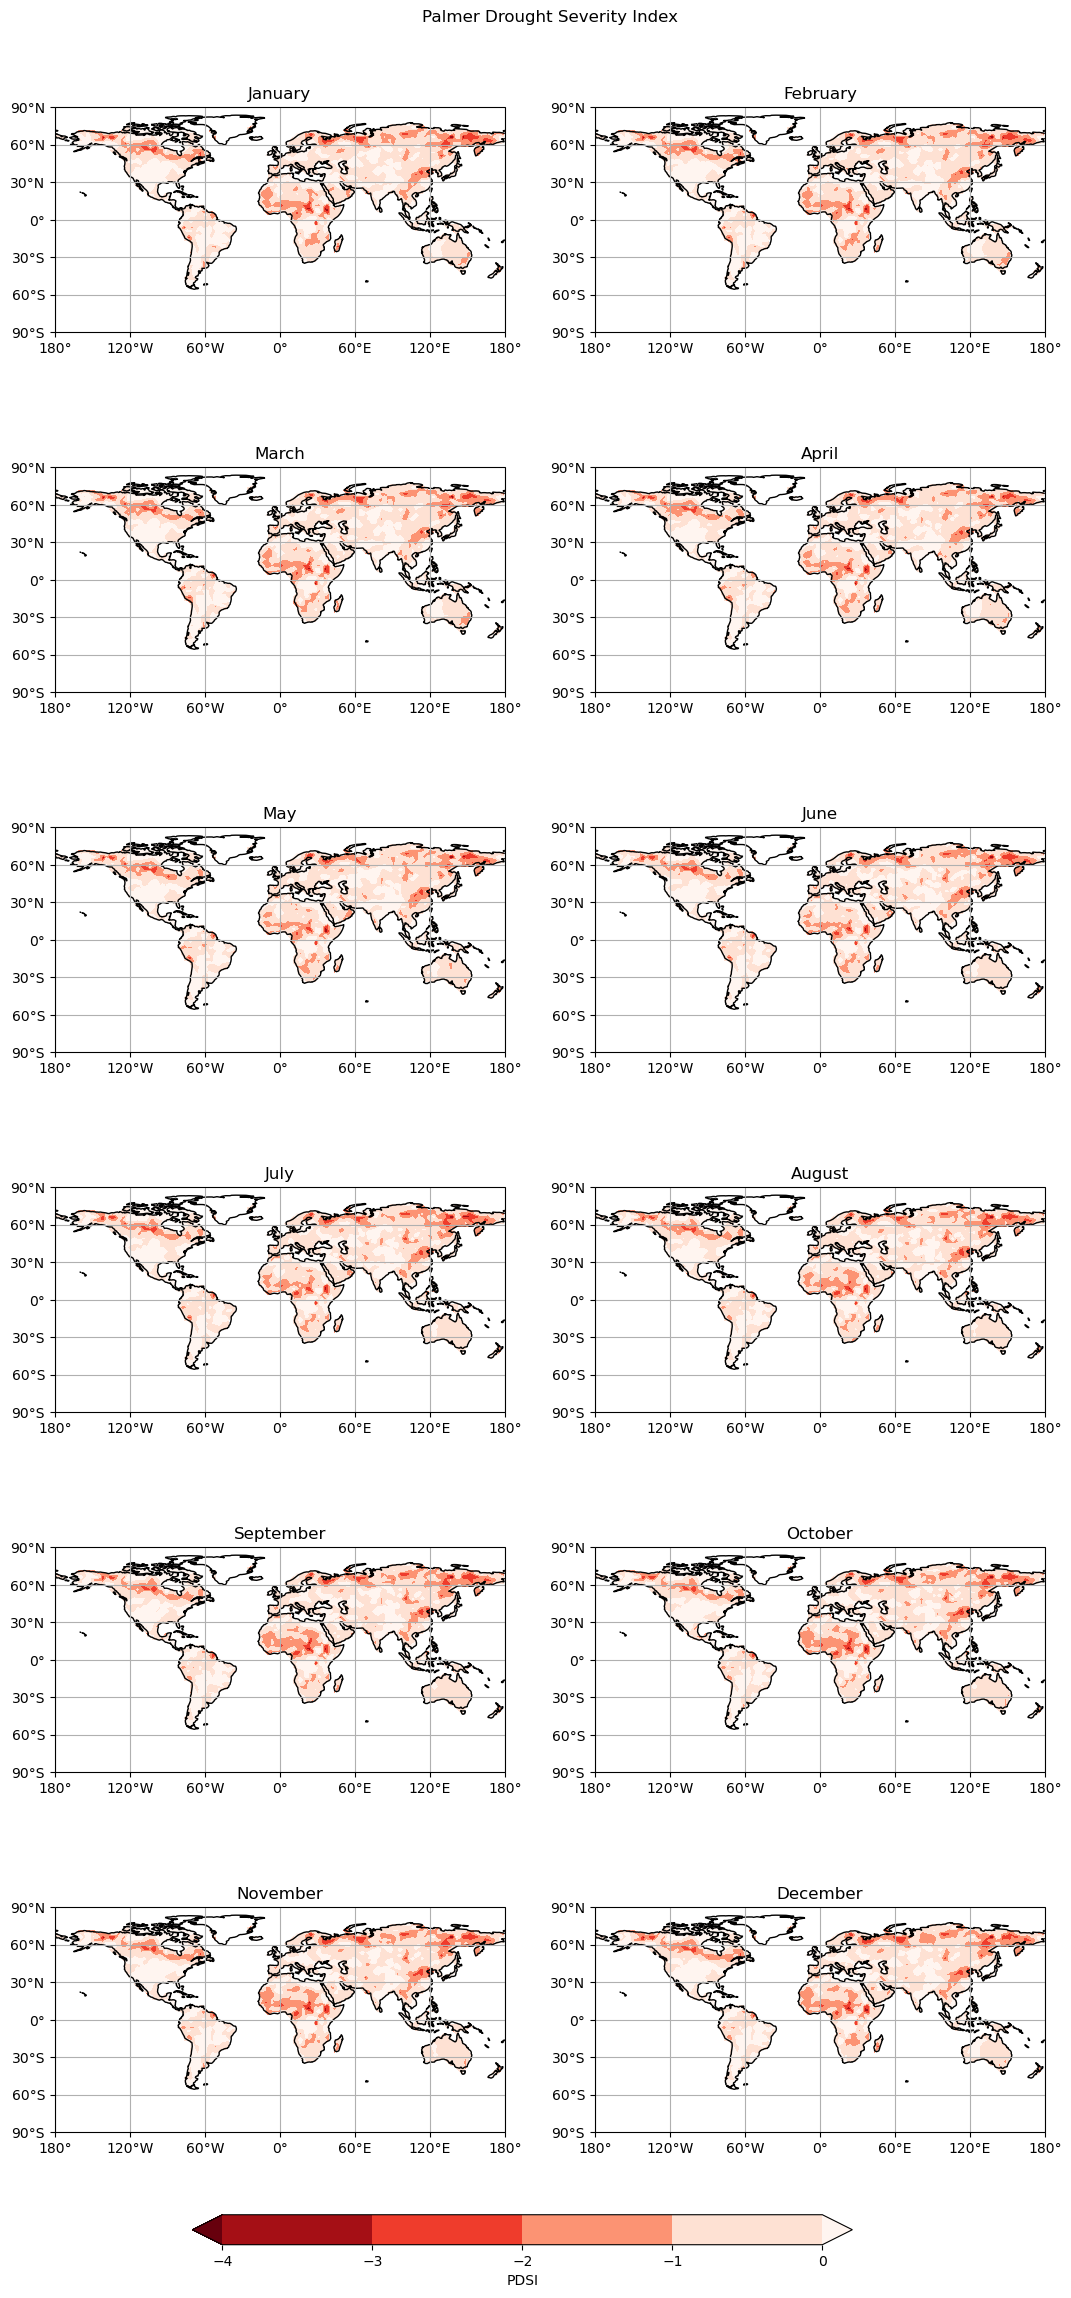

In [4]:
clevs=np.arange(-4,1,1)

fig, axs = plt.subplots(nrows=6,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,30))

axs=axs.flatten(order = 'C')

for i, month in enumerate(ds_month['month']):

        data=ds_month['pdsi'].sel(month=month)

        #data,lons=add_cyclic_point(data,coord=ds_month['lon'])

        cs=axs[i].contourf(ds_month['lon'],#lons,
                        ds_month['lat'],
                        data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='Reds_r',extend='both')

        axs[i].set_title(calendar.month_name[month.values])
        
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter) 

        axs[i].gridlines()

        axs[i].coastlines()

fig.subplots_adjust(bottom=0.2, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.2)

cbar_ax = fig.add_axes([0.175, 0.175, 0.6, 0.01])

cbar=fig.colorbar(cs, cax=cbar_ax, orientation='horizontal', label='PDSI')

plt.suptitle('Palmer Drought Severity Index', y= .92)